### 이분매칭(Biparite Matching)
- 유량 그래프에서 특수하면서도 메이저한 형태.
  - 모든 용량이 1인 다음과 같은 유량그래프가 있다고 했을 때
  - 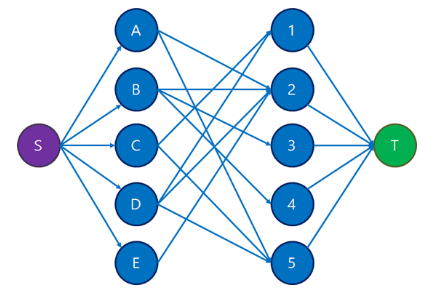\
  단, S와 ABCDE는 반드시 연결돼있고, 12345와 T도 반드시 연결돼있다.
  - 위의 그래프를 다음과 같이 축약할 수 있다.
  - 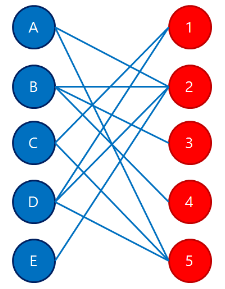
  - 이렇게 정점을 2개의 그룹으로 나누었을 때 각 그룹의 정점들이 서로 연결되어있는 그래프를 이분그래프(Bipartite Graph)라고 한다.
- 이분 매칭 문제의 답은, 축약된 이분 그래프에서 `매칭(matching)`의 최대 개수와 같다. 이를 보고 `최대 매칭(maximum matching)`이라고도 한다.
  - 매칭이란, 각 정점이 최대 한 개의 간선과 연결되어있는 상태를 말한다.
- 시간복잡도는 $\Omicron (V'E)$ 이다.
  - 이때 $V'$는 정점의 왼쪽과 오른쪽, 두 그룹중 큰 쪽의 크기이다.
  - 에드몬드 카프 알고리즘의 시간복잡도는 $\min(\Omicron(V'E^2), \Omicron(Ef^*))$ 인데, $f^*$ 은 최대 $\Omicron(V')$ 이므로, $\Omicron(V'E)$ 이므로, 둘의 시간복잡도는 같다.

### 이분 매칭의 구현
- 매칭에 성공하면 true, 실패하면 false를 반환하는 dfs를 이용하여 구현한다.
- 직원에 해당하는 왼쪽 그룹을 `A`, 할당시킬 일에 해당하는 오른쪽 그룹을 `B`라고 할 때
    1. `a`에 대해 연결된 매칭이 없다면 가능한 매칭인 `b`에 연결하고 `True`를 반환한다.
    2. `a`에 가능한 매칭이 없다면, 각 `A`의 정점들에 대해 어떤 정점 `a'`가 `b`로 일을 재배정 할 수 있을 경우 재배정하고 `True`를 반환한다.
    3. 재배정에 실패하면 `False`를 반환한다.
    4. `A`의 모든 정점에 대해 1~3을 반복한다.
- 코드 구현의 추가 설명은 11375(열혈강호)를 참고한다.

In [ ]:
def bipartite(G, N, M) :
  def dfs(x) :
    if vis[x]: return False

    vis[x] = True
    for y in G[x]:
      if sel[y] == -1 :
        sel[y] = x
        return True
      
    for y in G[x] :
      if dfs(sel[y]):
        sel[y] = x
        return True
    return False

  sel = [-1] * M
  res = 0
  for i in range(N) :
    vis = [False] * N
    res += dfs(i)
  return res, sel

### 구현 관련
- 간혹 dfs이전에 `vis[a] = True`로 시작하고, dfs 내부가 `sel[y] == -1 or dfs(sel[y])`로 시작하는 경우가 있는데, 이는 불필요한 재귀 호출을 추가로 발생시키기 때문에 비효율적이다.
  - 참고) https://www.acmicpc.net/status?problem_id=11014&user_id=kimdw9983

### 최대매칭과 최대독립집합
- 이분그래프는 정점을 두 그룹으로 나눌 수 있되, 같은 그룹끼리는 간선이 존재하지 않는 그래프를 말한다.
- 최대매칭 + 최대독립집합 = 정점의 개수
- 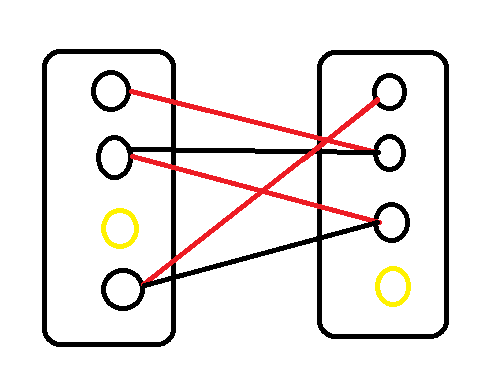\
빨간색: 매칭, 노란색: 독립 정점

### 문제 관련
- 어떤 문제를 이분 그래프로 나타내기 위해선 2개의 그룹으로 나눌 수 있어야 한다. \
홀짝으로 구분이 되던, 행과 열을 기준으로 하던... 문제를 보고 어떻게든 둘로 나눌 수 있는 포인트를 찾아내야 한다.
- 그리고 나뉘어진 두 그룹사이에 간선이 그려지면, 그렇게 매칭된 그룹은 더이상 사용할 수 없는 상태가 되는것과 비슷하다.
  - 예를 들어 두개의 쌍을 짓는다던가, 행과 열을 모두 사용이 된다던가 등등. 